In [1]:
from pathlib import Path
import dill
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# parent directory to path to import src module
sys.path.insert(0, str(Path.cwd().parent))

import src.unimib_snowit_project.utils as u

In [2]:
# Base Params

DATA_IN_DIR = 'data_input'
REVIEWS_IN_FILENAME = 'reviews.csv'                
REVIEWS_LABELLED_IN_FILENAME = 'reviews_labelled.csv' 

DATA_PKL_DIR = 'data_loaded'

REVIEWS_PKL_FILENAME = 'reviews.pkl'                 
REVIEWS_LABELLED_PKL_FILENAME = 'reviews_labelled.pkl'  

NA_VALUES = ['', ' ', '""',
             '#N/A', '#N/A N/A', '#NA', 'N/A', '<NA>', 'n/a', # 'NA',
             '-1.#IND', '1.#IND',
             '-1.#QNAN', '-NaN', '-nan', '-NAN', '1.#QNAN', 'NaN', 'nan', 'NAN',
             'NULL', 'Null', 'null',
             'NONE', 'None', 'none',
             ]

In [3]:
# Base paths

root_dir_path = u.get_root_dir()

data_in_dir_path = root_dir_path.joinpath(DATA_IN_DIR)
reviews_in_path = data_in_dir_path.joinpath(REVIEWS_IN_FILENAME)               
reviews_labelled_in_path = data_in_dir_path.joinpath(REVIEWS_LABELLED_IN_FILENAME)

data_pkl_dir_path = root_dir_path.joinpath(DATA_PKL_DIR)
reviews_pkl_path = data_pkl_dir_path.joinpath(REVIEWS_PKL_FILENAME)                
reviews_labelled_pkl_path = data_pkl_dir_path.joinpath(REVIEWS_LABELLED_PKL_FILENAME) 

## Load Reviews

In [4]:
safeload_reviews_df = pd.read_csv(reviews_in_path,
                                  dtype="string",
                                  na_values=[],
                                  keep_default_na=False
                                  )

In [5]:
safeload_reviews_df.columns

Index(['review.uid', 'user.uid', 'text'], dtype='object')

In [6]:
reviews_df = pd.read_csv(reviews_in_path,
                         keep_default_na=False,
                         na_values=NA_VALUES,
                         dtype={
                             "review.uid": "string",   
                             "user.uid": "string",     
                             "text": "string"          
                         }
                         )

reviews_df["text"] = (
    reviews_df["text"]
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
)

In [7]:
# CHECK PK VALIDITY

# SELECT count(1) as num_rows
# FROM reviews_df
# WHERE review.uid IS NULL

display(
    reviews_df
    .loc[lambda tbl: tbl["review.uid"].isnull()]
    .assign(aux=1.0)
    .shape[0]
)

# SELECT review.uid, count(1) as num_rows
# FROM reviews_df
# GROUP BY review.uid
# HAVING num_rows > 1

display(
    reviews_df
    .assign(aux=1.0)
    .groupby(["review.uid"], dropna=False)
    .agg(num_rows=("aux", pd.Series.count))
    .loc[lambda tbl: tbl["num_rows"] > 1]
)

0

,num_rows
review.uid,


## Load Reviews Labelled

In [8]:
safeload_reviews_labelled_df = pd.read_csv(reviews_labelled_in_path,
                                           dtype="string",
                                           na_values=[],
                                           keep_default_na=False
                                           )

safeload_reviews_labelled_df.columns

Index(['labelled_review.uid', 'text', 'sentiment_label'], dtype='object')

In [9]:
reviews_labelled_df = pd.read_csv(
    reviews_labelled_in_path,
    keep_default_na=False,
    na_values=NA_VALUES,
    dtype={
        "labelled_review.uid": "string",   
        "text": "string",                  
        "sentiment_label": "string"        
    }
)

reviews_labelled_df["text"] = (
    reviews_labelled_df["text"]
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
)

reviews_labelled_df["sentiment_label"] = (
    reviews_labelled_df["sentiment_label"]
    .str.strip()
    .str.lower()
)

In [10]:
# CHECK PK VALIDITY

# SELECT count(1)
# FROM reviews_labelled_df
# WHERE labelled_review.uid IS NULL

display(
    reviews_labelled_df
    .loc[lambda tbl: tbl["labelled_review.uid"].isnull()]
    .assign(aux=1.0)
    .shape[0]
)

# SELECT labelled_review.uid, count(1)
# FROM reviews_labelled_df
# GROUP BY labelled_review.uid
# HAVING count(1) > 1

display(
    reviews_labelled_df
    .assign(aux=1.0)
    .groupby(["labelled_review.uid"], dropna=False)
    .agg(num_rows=("aux", pd.Series.count))
    .loc[lambda tbl: tbl["num_rows"] > 1]
)

0

,num_rows
labelled_review.uid,


In [11]:
with reviews_pkl_path.open('wb') as fh:
    dill.dump(reviews_df, fh)
print(f"Save reviews data in {reviews_pkl_path.as_posix()}")

with reviews_labelled_pkl_path.open('wb') as fh:
    dill.dump(reviews_labelled_df, fh)
print(f"Save reviews labelled data in {reviews_labelled_pkl_path.as_posix()}")

Save reviews data in /Users/farabiisa/Desktop/Bicocca/Marketing Analytics/unimib_snowit_project/data_loaded/reviews.pkl
Save reviews labelled data in /Users/farabiisa/Desktop/Bicocca/Marketing Analytics/unimib_snowit_project/data_loaded/reviews_labelled.pkl


In [12]:
DATA_PKL_DIR = "data_loaded"

# Filenames
REVIEWS_PKL_FILENAME = "reviews.pkl"              
REVIEWS_LABELLED_PKL_FILENAME = "reviews_labelled.pkl" 

# Root directory
root_dir_path = u.get_root_dir()

# Base PKL directory
data_pkl_dir_path = root_dir_path / DATA_PKL_DIR

# PKL paths
reviews_pkl_path = data_pkl_dir_path / REVIEWS_PKL_FILENAME             
reviews_labelled_pkl_path = data_pkl_dir_path / REVIEWS_LABELLED_PKL_FILENAME 

# Loader
def load_pkl(pkl_path):
    with pkl_path.open("rb") as fh:
        return dill.load(fh)

# Load DataFrames
reviews_df = load_pkl(reviews_pkl_path)                       
reviews_labelled_df = load_pkl(reviews_labelled_pkl_path)     

In [13]:
reviews_df

,review.uid,user.uid,text
0,1,tcdf7enqg9sxqq4ie4qh3xzjbt,I have bought several of the Vitality canned d...
1,2,kszpqbggktbzmtkkkejthwyucw,Product arrived labeled as Jumbo Salted Peanut...
2,3,l01hczdvthqra6hsxbovmqipdc,This is a confection that has been around a fe...
3,4,cmszp7l1j9pt53fvt178v3avxd,If you are looking for the secret ingredient i...
4,5,bhimnczlhxddegbdaytb7gbhx2,Great taffy at a great price. There was a wide...
...,...,...,...
105705,140942,aucpq6co8tbk8qelhzezxa4rkm,"We Love,Love our Keurig coffee maker .My husba..."
105706,140943,bybi8rqc0odzbnbdlohrlqp9jt,This is supposed to be a light roast coffee bu...
105707,140944,lnp0swzvbkuhvqvdx0ctmjwn7v,I have always been happy with my Kcups but thi...
105708,140945,miyvfildj9cxsn27tqt3khp6gt,I ordered light roast coffee and was sent one ...


In [14]:
reviews_labelled_df

,labelled_review.uid,text,sentiment_label
0,0,I'm no bitters expert but I bought it as a gif...,neutral
1,1,"these are probably great in the right drinks, ...",neutral
2,2,I sent these to my dad for his bday and he sai...,positive
3,3,I purchased these as a gift for family member ...,positive
4,4,My wife bought me this sauce sampler for Chris...,neutral
...,...,...,...
462739,462739,Great for sesame chicken..this is a good if no...,positive
462740,462740,I'm disappointed with the flavor. The chocolat...,neutral
462741,462741,"These stars are small, so you can give 10-15 o...",positive
462742,462742,These are the BEST treats for training and rew...,positive


## Cleaning

In [15]:
import re

def clean_review_text(text: str) -> str:
    if text is None or pd.isna(text):
        return ""

    # 1) lowercase
    text = text.lower()

    # 2) remove URLs
    text = re.sub(r"http\S+|www\S+", "", text)

    # 3) remove HTML tags
    text = re.sub(r"<.*?>", "", text)

    # 4) remove non-alphabetic characters (keep letters, numbers, punctuation)
    text = re.sub(r"[^a-z0-9.,!?;:'\"()\s]", " ", text)

    # 5) normalize multiple spaces
    text = re.sub(r"\s+", " ", text).strip()

    # 6) normalize repeated punctuation
    text = re.sub(r"([!?.,])\1+", r"\1", text)

    return text


reviews_df["text"] = reviews_df["text"].apply(clean_review_text)
reviews_labelled_df["text"] = reviews_labelled_df["text"].apply(clean_review_text)

reviews_labelled_df = reviews_labelled_df.loc[
    reviews_labelled_df["text"].str.len() > 3
].reset_index(drop=True)

In [16]:
sentiment_df = reviews_labelled_df[
    ["labelled_review.uid", "text", "sentiment_label"]
].copy()

sentiment_df = sentiment_df.rename(columns={"labelled_review.uid": "id"})

In [17]:
X = sentiment_df["text"]
y = sentiment_df["sentiment_label"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    lowercase=True,
    strip_accents="unicode",
    sublinear_tf=True,
    min_df=2,
    max_df=0.95,
    ngram_range=(1, 2)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("Train matrix shape:", X_train_tfidf.shape)
print("Test matrix shape:", X_test_tfidf.shape)

Train matrix shape: (370186, 1127729)
Test matrix shape: (92547, 1127729)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

final_clf = LogisticRegression(
    max_iter=1500,
    class_weight="balanced"
)

final_clf.fit(X_train_tfidf, y_train)

y_pred = final_clf.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.72      0.86      0.78      8470
     neutral       0.72      0.76      0.73     24677
    positive       0.92      0.88      0.90     59400

    accuracy                           0.84     92547
   macro avg       0.79      0.83      0.81     92547
weighted avg       0.85      0.84      0.85     92547



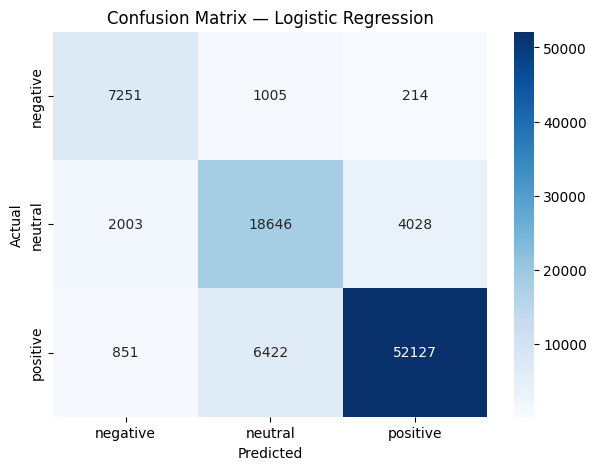

In [20]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=final_clf.classes_,
            yticklabels=final_clf.classes_,
            cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Logistic Regression")
plt.show()

In [21]:
reviews_df

,review.uid,user.uid,text
0,1,tcdf7enqg9sxqq4ie4qh3xzjbt,i have bought several of the vitality canned d...
1,2,kszpqbggktbzmtkkkejthwyucw,product arrived labeled as jumbo salted peanut...
2,3,l01hczdvthqra6hsxbovmqipdc,this is a confection that has been around a fe...
3,4,cmszp7l1j9pt53fvt178v3avxd,if you are looking for the secret ingredient i...
4,5,bhimnczlhxddegbdaytb7gbhx2,great taffy at a great price. there was a wide...
...,...,...,...
105705,140942,aucpq6co8tbk8qelhzezxa4rkm,"we love,love our keurig coffee maker .my husba..."
105706,140943,bybi8rqc0odzbnbdlohrlqp9jt,this is supposed to be a light roast coffee bu...
105707,140944,lnp0swzvbkuhvqvdx0ctmjwn7v,i have always been happy with my kcups but thi...
105708,140945,miyvfildj9cxsn27tqt3khp6gt,i ordered light roast coffee and was sent one ...


## Sentiment predictions for all reviews using the trained model.

In [22]:
reviews_tfidf = tfidf.transform(reviews_df["text"])

reviews_df["sentiment_pred"] = final_clf.predict(reviews_tfidf)

In [23]:
reviews_df.head()

,review.uid,user.uid,text,sentiment_pred
0,1,tcdf7enqg9sxqq4ie4qh3xzjbt,i have bought several of the vitality canned d...,neutral
1,2,kszpqbggktbzmtkkkejthwyucw,product arrived labeled as jumbo salted peanut...,negative
2,3,l01hczdvthqra6hsxbovmqipdc,this is a confection that has been around a fe...,positive
3,4,cmszp7l1j9pt53fvt178v3avxd,if you are looking for the secret ingredient i...,neutral
4,5,bhimnczlhxddegbdaytb7gbhx2,great taffy at a great price. there was a wide...,positive
